In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib notebook

%matplotlib inline

In [186]:
df= pd.read_csv('/Users/prachisadarangani/Documents/Syracuse University /fALL 2023 SEM 3/AML/Assignment 4 /HW4-data-fedPapers85(1).csv')

In [187]:
df = df.drop('filename',axis=1)
df1 = df[df['author'] != 'dispt']
df_new = df[df['author'] == 'dispt']
X_new = df_new.drop('author', axis=1)
y_new= df_new['author']
X= df1.drop('author', axis=1)
y= df1['author']


11    Hamilton
12    Hamilton
13    Hamilton
14    Hamilton
15    Hamilton
        ...   
80     Madison
81     Madison
82     Madison
83     Madison
84     Madison
Name: author, Length: 74, dtype: object

In [181]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =22)

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

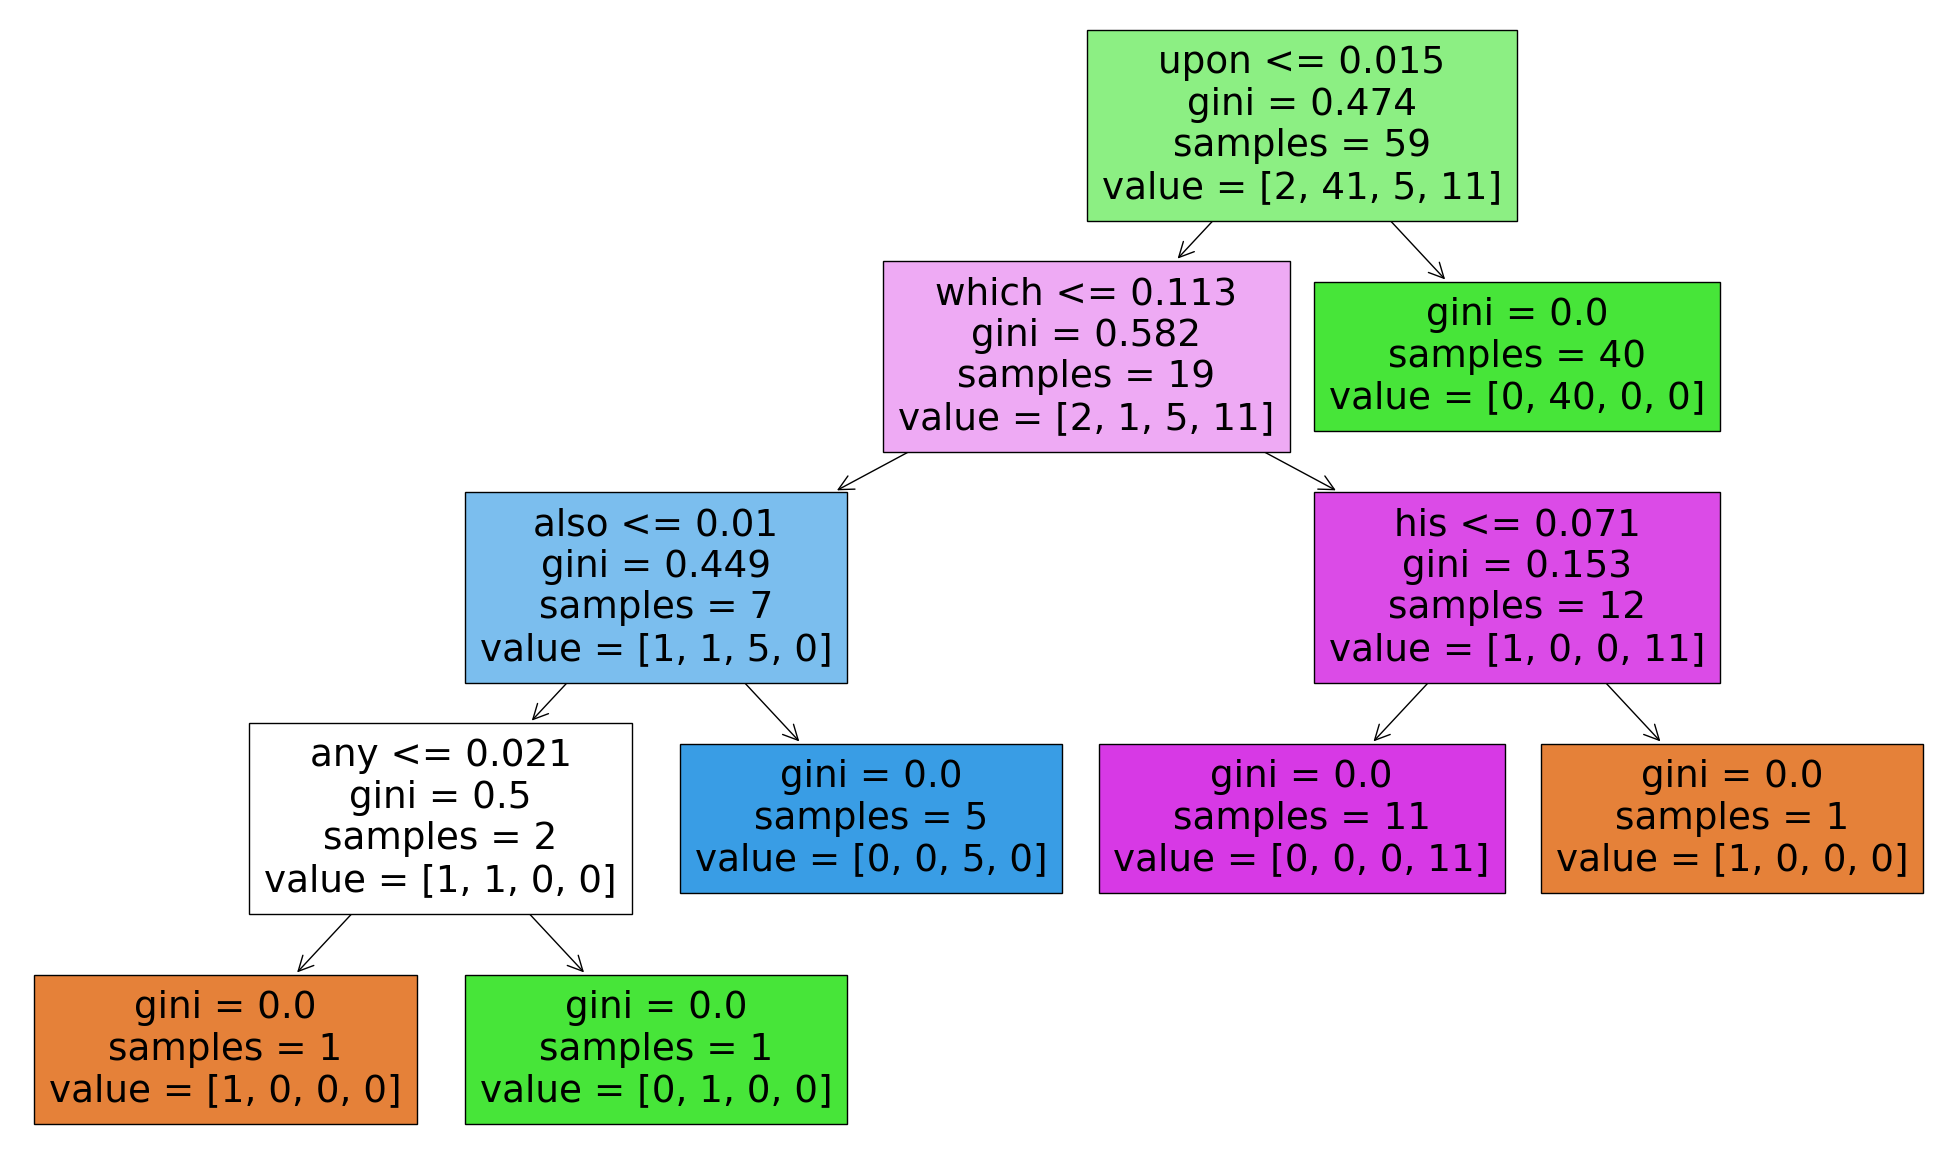

In [194]:
from sklearn import tree

fig = plt.figure(figsize=(25,15))
tree.plot_tree(model, filled=True, feature_names=list(X.columns))
plt.show()

In [90]:
#lets check the cv score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_test_pred)
accuracy

0.9333333333333333

In [100]:
precision = precision_score(y_test, y_test_pred, average='weighted')
precision

0.9393939393939393

In [99]:
f1score = f1_score(y_test,y_test_pred, average='weighted')
f1score

0.9301587301587302

In [92]:
y_pred = model.predict(X_new)

In [93]:
y_pred

array(['Madison', 'Madison', 'HM', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison', 'Madison', 'Madison'],
      dtype=object)

In [162]:
#modeling after tuning
model2 = DecisionTreeClassifier(max_depth = None, min_samples_leaf = 20, random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [163]:
y_test_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test,y_test_pred)
accuracy

0.9333333333333333

In [164]:
precision = precision_score(y_test, y_test_pred, average='weighted')
precision

/Users/prachisadarangani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.88

In [165]:
f1score = f1_score(y_test,y_test_pred, average='weighted')
f1score

0.9037037037037037

In [161]:
#tuning the model reduces the precision and f1score so we will use the model 1 itself 